## –ú–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ–±—ä–µ–º–∞ —É–±–æ—è –ö–†–° –ø–æ –ñ–∞–º–±—ã–ª—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA

In [2]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ –ö–†–°.xlsx")
df.sample(10)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥       –ö–†–°  –û—Å–∞–¥–∫–∏  \
1952           –ú–ê–ù–ì–ò–°–¢–ê–£–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-07    100.98     6.4   
2331    –°–ï–í–ï–†–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2018-05   2561.11    62.6   
541   –í–û–°–¢–û–ß–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2020-02   7826.65    60.8   
367               –ê–¢–´–†–ê–£–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-08   1623.48     3.4   
867                     –ì–û–†–û–î –ê–õ–ú–ê–¢–´  2017-04       NaN   216.7   
753                          –ì–ê–°–¢–ê–ù–ê  2017-10     17.02     NaN   
713                          –ì–ê–õ–ú–ê–¢–´  2024-06      2.30     NaN   
1495          –ö–ê–†–ê–ì–ê–ù–î–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2016-06   9486.44    62.5   
546   –í–û–°–¢–û–ß–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2020-07  10335.39    61.8   
1966                    –û–ë–õ–ê–°–¢–¨ –ê–ë–ê–ô  2023-02   2088.83    35.0   

      –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  
1952         18717.0    26.658065  
2331        449030.0     9.393548  
541        1022237.0    -6.093103  
367         165536.0    25.241935  
867           2950.0    11.190000  
753              NaN          NaN  
713              NaN          NaN  
1495        642223.0    17.770000  
546        1277783.0    21.506452  
1966         28148.0   -11.339286

In [3]:
df_zhambyl = df[df['–†–µ–≥–∏–æ–Ω'] == '–ñ–ê–ú–ë–´–õ–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_zhambyl = df_zhambyl.drop('–†–µ–≥–∏–æ–Ω', axis = 'columns')
df_zhambyl.head()

–ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
1238  2015-01  2731.22    48.5        303643.0    -2.306452
1239  2015-02  3109.06    25.3        316778.0     1.871429
1240  2015-03  2538.81    36.2        344717.0     3.958065
1241  2015-04  3379.88    25.4        357904.0    14.166667
1242  2015-05  2921.49    16.4        356641.0    20.106452

In [4]:
df_zhambyl = df_zhambyl.rename(columns={'–ö–†–°': '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°'})
df_zhambyl.head()

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
1238  2015-01          2731.22    48.5        303643.0    -2.306452
1239  2015-02          3109.06    25.3        316778.0     1.871429
1240  2015-03          2538.81    36.2        344717.0     3.958065
1241  2015-04          3379.88    25.4        357904.0    14.166667
1242  2015-05          2921.49    16.4        356641.0    20.106452

In [5]:
df_zhambyl['–ü–µ—Ä–∏–æ–¥'] = pd.to_datetime(df_zhambyl['–ü–µ—Ä–∏–æ–¥'], format='%Y-%m')
df_zhambyl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 1238 to 1357
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   –ü–µ—Ä–∏–æ–¥           120 non-null    datetime64[ns]
 1   –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  120 non-null    float64       
 2   –û—Å–∞–¥–∫–∏           120 non-null    float64       
 3   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°   120 non-null    float64       
 4   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞      120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.6 KB


In [6]:
df_zhambyl.isna().sum()

–ü–µ—Ä–∏–æ–¥             0
–û–±—ä–µ–º —É–±–æ—è: –ö–†–°    0
–û—Å–∞–¥–∫–∏             0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°     0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞        0
dtype: int64

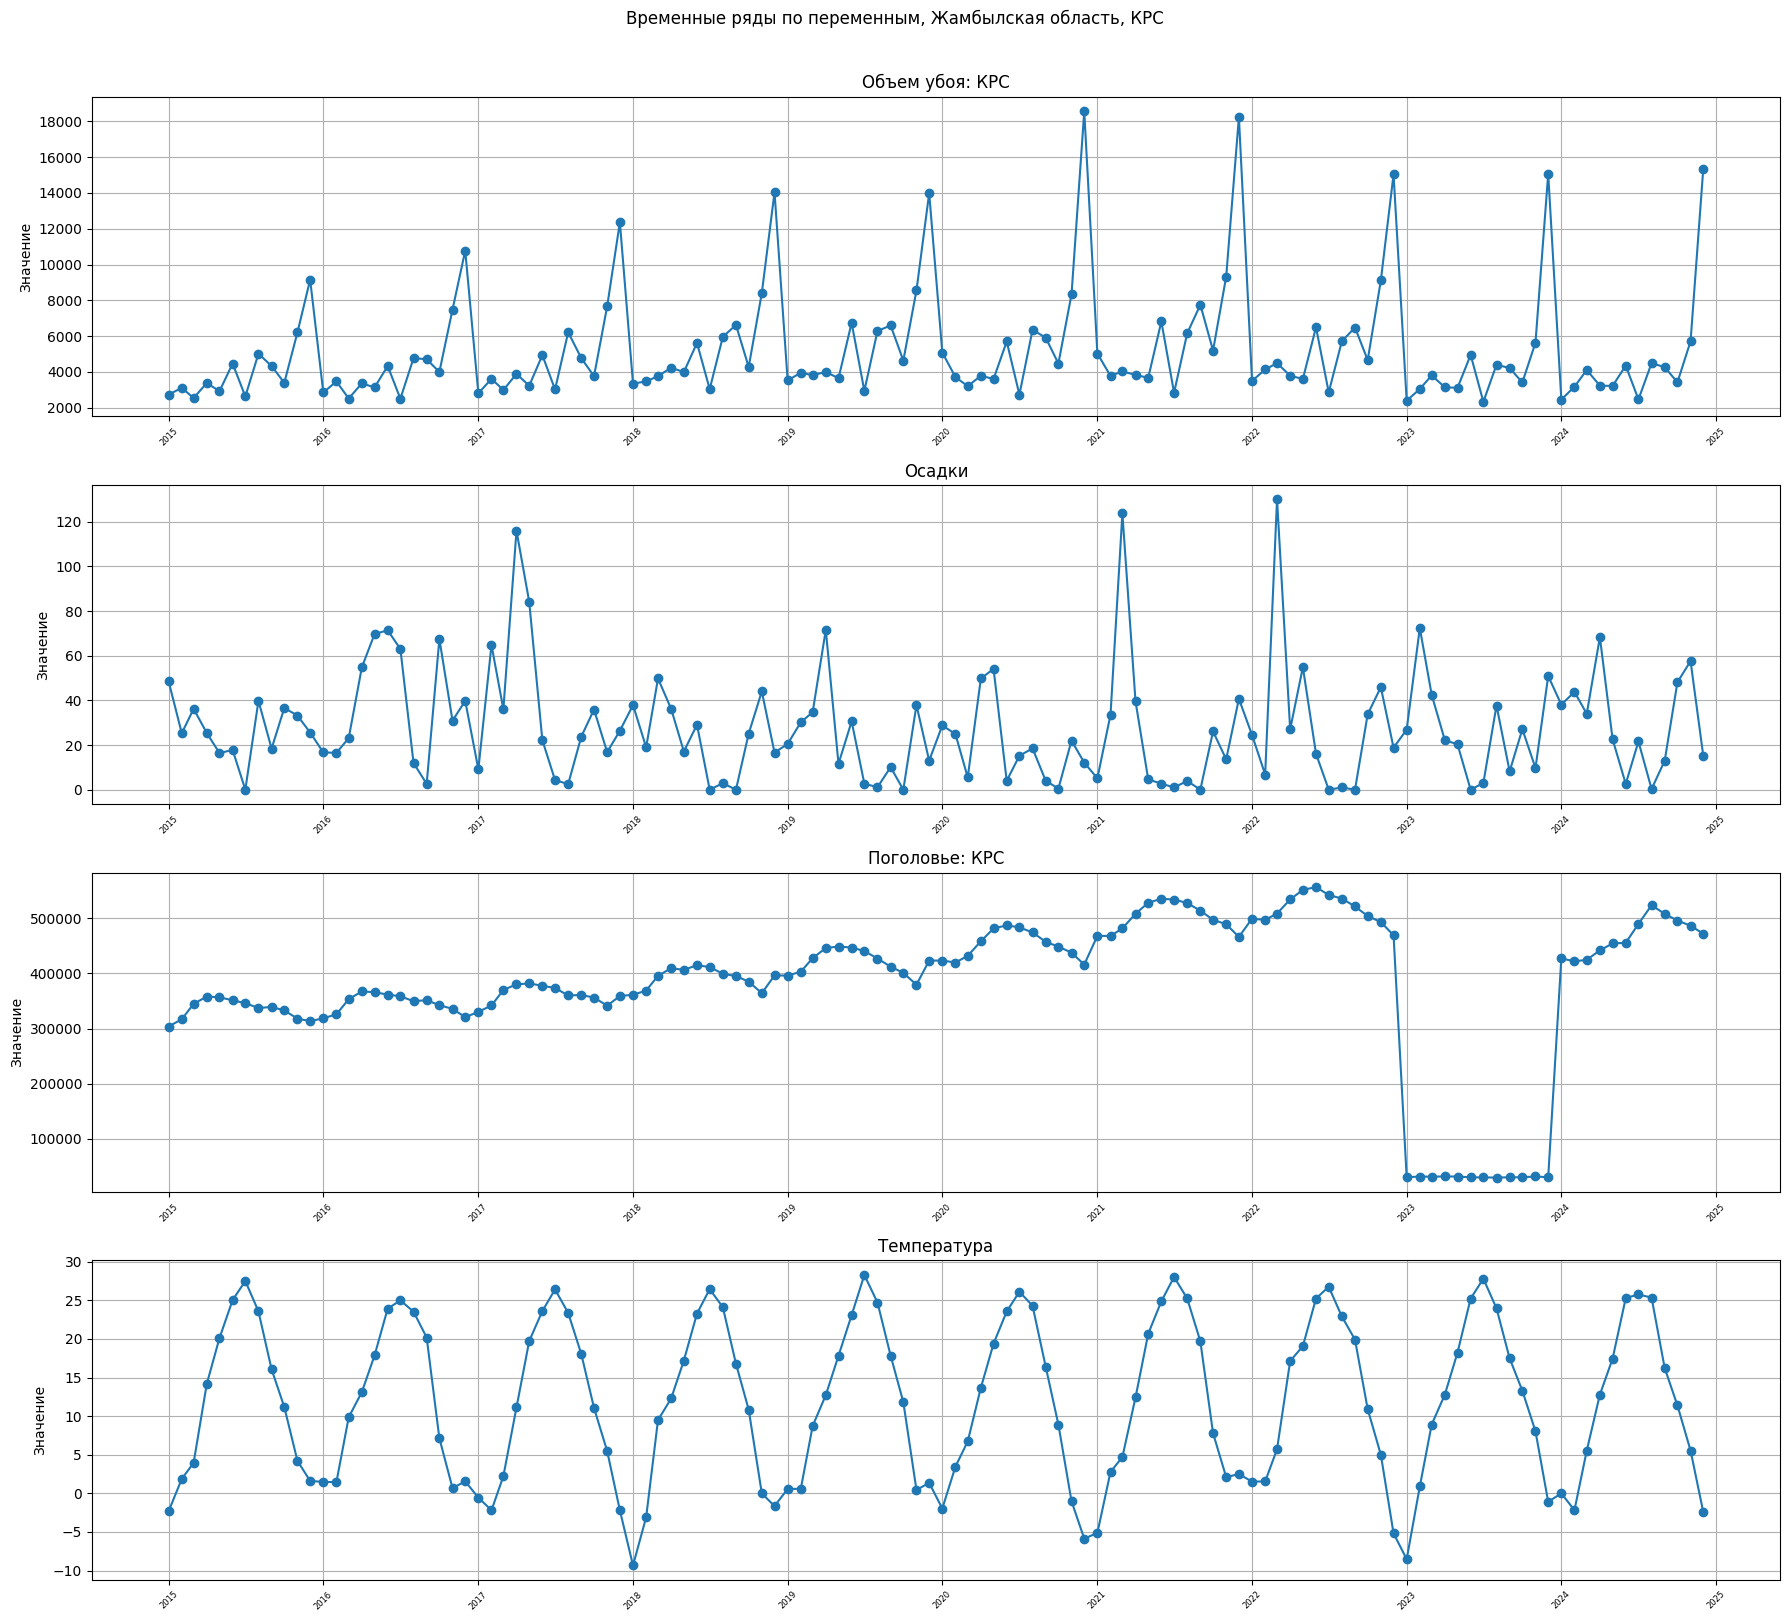

In [7]:
# Plot each variable in its own subplot
value_cols = [col for col in df_zhambyl.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_zhambyl["–ü–µ—Ä–∏–æ–¥"], df_zhambyl[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45, fontsize = 6)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)
plt.tight_layout()
plt.show()

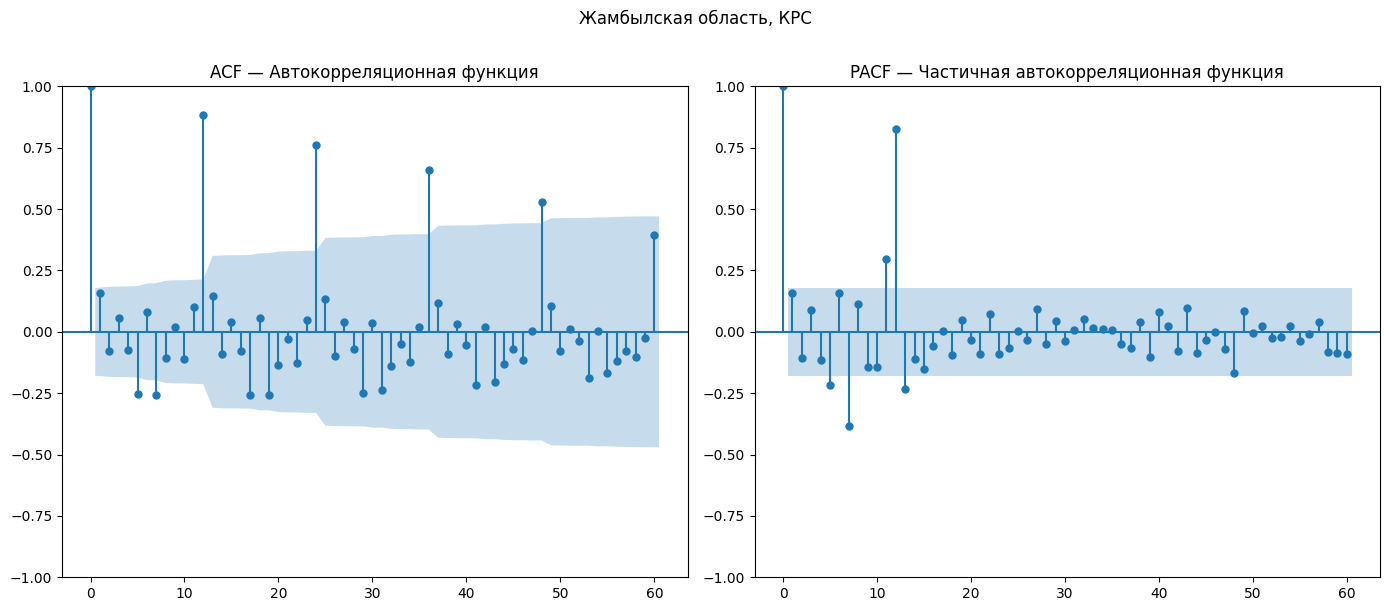

In [8]:
y = df_zhambyl["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].sort_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(y, lags=60, ax=plt.gca(), title="ACF ‚Äî –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=60, ax=plt.gca(), title="PACF ‚Äî –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", method="ywm")
plt.suptitle("–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)

plt.tight_layout()
plt.show()

–ì—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–π —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—É—é **–≥–æ–¥–æ–≤—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (–ø–∏–∫–∏ –Ω–∞ +12, +24, +36 –∏ +48 –º–µ—Å—è—Ü–µ–≤). 

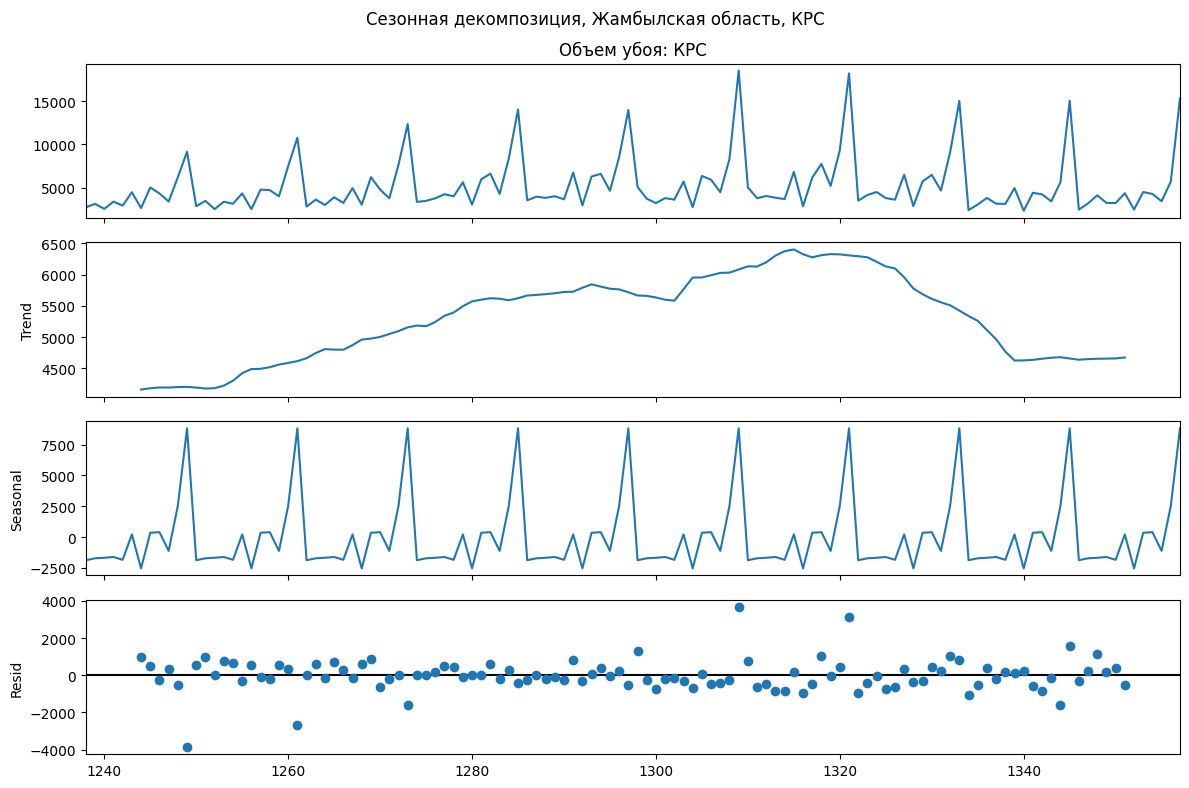

In [9]:
# Perform decomposition (period=12 for monthly data)
decomposition = seasonal_decompose(df_zhambyl["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"], model="additive", period=12)

# Plot with larger figure size
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("–°–µ–∑–æ–Ω–Ω–∞—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è, –ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", fontsize=12)
plt.tight_layout()
plt.show()


In [10]:
# Run ADF test
result = adfuller(df_zhambyl["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"])

# Display results
print("üìä Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Interpretation
if result[1] < 0.05:
    print("‚úÖ The series is likely **stationary** (reject H‚ÇÄ).")
else:
    print("‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).")


üìä Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.3938
p-value: 0.5853
Critical Value (1%): -3.4936
Critical Value (5%): -2.8892
Critical Value (10%): -2.5815
‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ ADF —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **–Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å** –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

In [11]:
df_zhambyl

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
1238 2015-01-01          2731.22    48.5        303643.0    -2.306452
1239 2015-02-01          3109.06    25.3        316778.0     1.871429
1240 2015-03-01          2538.81    36.2        344717.0     3.958065
1241 2015-04-01          3379.88    25.4        357904.0    14.166667
1242 2015-05-01          2921.49    16.4        356641.0    20.106452
...         ...              ...     ...             ...          ...
1353 2024-08-01          4488.08     0.3        523425.0    25.345161
1354 2024-09-01          4264.39    13.0        507738.0    16.213333
1355 2024-10-01          3418.05    48.1        495712.0    11.387097
1356 2024-11-01          5708.50    57.6        486310.0     5.546667
1357 2024-12-01         15350.76    15.2        471712.0    -2.419355

[120 rows x 5 columns]

In [12]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ª–∞–≥–æ–≤ t-1 –¥–æ t-6 –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
for lag in range(1, 7):
    df_zhambyl[f"–ö–†–°_t-{lag}"] = df_zhambyl["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)
    df_zhambyl[f"–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-{lag}"] = df_zhambyl["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].shift(lag)
    df_zhambyl[f"–û—Å–∞–¥–∫–∏_t-{lag}"] = df_zhambyl["–û—Å–∞–¥–∫–∏"].shift(lag)
    df_zhambyl[f"–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-{lag}"] = df_zhambyl["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"].shift(lag)

df_zhambyl_full = df_zhambyl[["–ü–µ—Ä–∏–æ–¥", "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", 
                            "–ö–†–°_t-1", "–ö–†–°_t-2", "–ö–†–°_t-3", "–ö–†–°_t-4", "–ö–†–°_t-5", "–ö–†–°_t-6",
                            "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6",
                            "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4", "–û—Å–∞–¥–∫–∏_t-5", "–û—Å–∞–¥–∫–∏_t-6",
                            "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-5", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-6"]]
df_zhambyl_full

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  –ö–†–°_t-5  \
1238 2015-01-01          2731.22      NaN      NaN      NaN      NaN      NaN   
1239 2015-02-01          3109.06  2731.22      NaN      NaN      NaN      NaN   
1240 2015-03-01          2538.81  3109.06  2731.22      NaN      NaN      NaN   
1241 2015-04-01          3379.88  2538.81  3109.06  2731.22      NaN      NaN   
1242 2015-05-01          2921.49  3379.88  2538.81  3109.06  2731.22      NaN   
...         ...              ...      ...      ...      ...      ...      ...   
1353 2024-08-01          4488.08  2461.28  4352.03  3215.25  3231.51  4104.82   
1354 2024-09-01          4264.39  4488.08  2461.28  4352.03  3215.25  3231.51   
1355 2024-10-01          3418.05  4264.39  4488.08  2461.28  4352.03  3215.25   
1356 2024-11-01          5708.50  3418.05  4264.39  4488.08  2461.28  4352.03   
1357 2024-12-01         15350.76  5708.50  3418.05  4264.39  4488.08  2461.28   

      –ö–†–°_t-6  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
1238      NaN    -2.306452              NaN              NaN              NaN   
1239      NaN     1.871429        -2.306452              NaN              NaN   
1240      NaN     3.958065         1.871429        -2.306452              NaN   
1241      NaN    14.166667         3.958065         1.871429        -2.306452   
1242      NaN    20.106452        14.166667         3.958065         1.871429   
...       ...          ...              ...              ...              ...   
1353  3173.15    25.345161        25.758065        25.286667        17.441935   
1354  4104.82    16.213333        25.345161        25.758065        25.286667   
1355  3231.51    11.387097        16.213333        25.345161        25.758065   
1356  3215.25     5.546667        11.387097        16.213333        25.345161   
1357  4352.03    -2.419355         5.546667        11.387097        16.213333   

      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  \
1238              NaN              NaN              NaN    48.5         NaN   
1239              NaN              NaN              NaN    25.3        48.5   
1240              NaN              NaN              NaN    36.2        25.3   
1241              NaN              NaN              NaN    25.4        36.2   
1242        -2.306452              NaN              NaN    16.4        25.4   
...               ...              ...              ...     ...         ...   
1353        12.786667         5.535484        -2.175862     0.3        21.6   
1354        17.441935        12.786667         5.535484    13.0         0.3   
1355        25.286667        17.441935        12.786667    48.1        13.0   
1356        25.758065        25.286667        17.441935    57.6        48.1   
1357        25.345161        25.758065        25.286667    15.2        57.6   

      –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  –û—Å–∞–¥–∫–∏_t-5  –û—Å–∞–¥–∫–∏_t-6  \
1238         NaN         NaN         NaN         NaN         NaN   
1239         NaN         NaN         NaN         NaN         NaN   
1240        48.5         NaN         NaN         NaN         NaN   
1241        25.3        48.5         NaN         NaN         NaN   
1242        36.2        25.3        48.5         NaN         NaN   
...          ...         ...         ...         ...         ...   
1353         2.6        22.6        68.3        34.0        43.8   
1354        21.6         2.6        22.6        68.3        34.0   
1355         0.3        21.6         2.6        22.6        68.3   
1356        13.0         0.3        21.6         2.6        22.6   
1357        48.1        13.0         0.3        21.6         2.6   

      –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
1238        303643.0                 NaN  

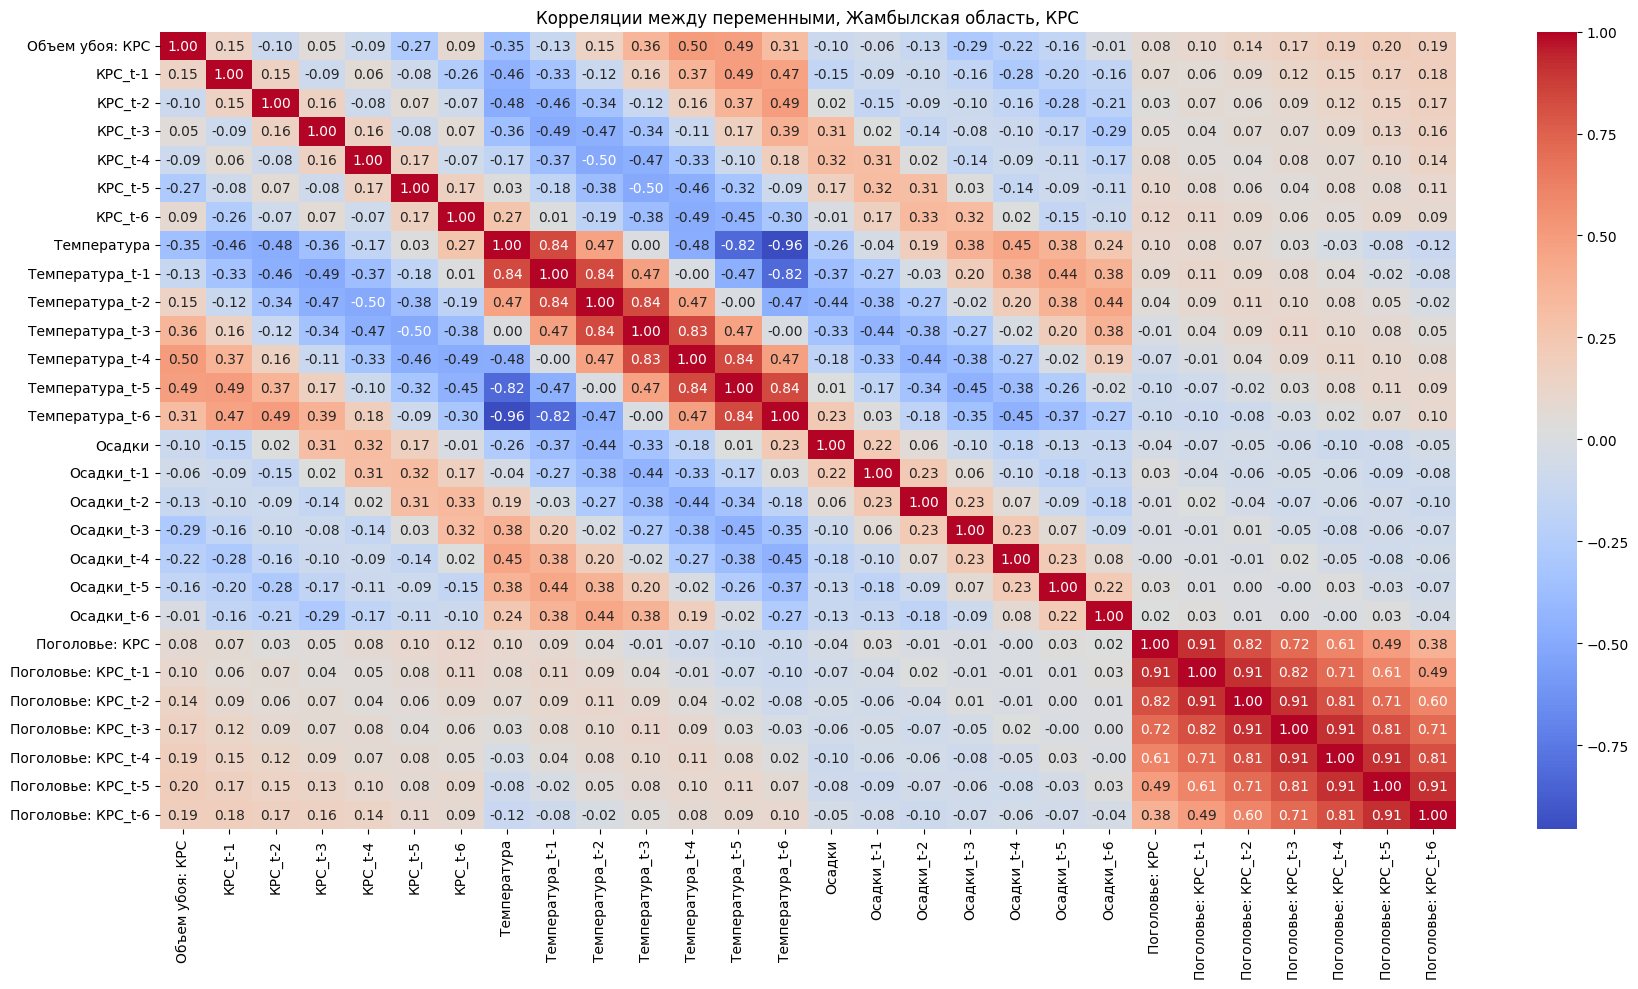

In [13]:
df_corr = df_zhambyl_full[[col for col in df_zhambyl_full.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°")
plt.tight_layout()
plt.show()

*–í–´–í–û–î–´ –ü–û –ö–û–†–†–ï–õ–Ø–¶–ò–ò*

In [ ]:
# Set your target variable
target_var = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"

# Get correlations with the target variable
target_corr = corr_matrix[target_var].drop(target_var)  # exclude self-correlation

# Keep only features with |correlation| >= 0.5
selected_vars = target_corr[abs(target_corr) >= 0.49].index.tolist()

print("‚úÖ –û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >= 0.5:")
print(selected_vars)

# Optionally: create new dataframe with selected variables + target
df_selected = df_zhambyl_full[['–ü–µ—Ä–∏–æ–¥'] + selected_vars + [target_var]]
df_selected

‚úÖ –û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >= 0.4:
['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4']


–ü–µ—Ä–∏–æ–¥  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°
1238 2015-01-01              NaN          2731.22
1239 2015-02-01              NaN          3109.06
1240 2015-03-01              NaN          2538.81
1241 2015-04-01              NaN          3379.88
1242 2015-05-01        -2.306452          2921.49
...         ...              ...              ...
1353 2024-08-01        12.786667          4488.08
1354 2024-09-01        17.441935          4264.39
1355 2024-10-01        25.286667          3418.05
1356 2024-11-01        25.758065          5708.50
1357 2024-12-01        25.345161         15350.76

[120 rows x 3 columns]

In [28]:
df_vif = df_selected[[col for col in df_selected.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()

X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data.sort_values('VIF')

Variable       VIF
1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  1.000000
0            const  2.334576

Step-by-Step Strategy to Handle High VIFs:

Sort VIFs in descending order
Drop variables one at a time, starting with the one that has the highest VIF.

Check domain relevance
Keep variables that are theoretically important or core to your hypothesis, even if VIF is high.

Evaluate correlation matrix
If two variables have high correlation with each other, and both have high VIFs, drop the one less correlated with the target.

Recalculate VIF after each drop
After dropping one variable, recalculate all VIFs. Sometimes removing just one variable significantly reduces others.

Use stepwise selection (optional)
Automated methods like backward elimination can help drop redundant predictors based on model fit and VIF thresholds.

In [23]:
# df_selected = df_selected.drop(columns = ['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6'])
df_selected

–ü–µ—Ä–∏–æ–¥  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°
1238 2015-01-01              NaN              NaN          2731.22
1239 2015-02-01              NaN              NaN          3109.06
1240 2015-03-01              NaN              NaN          2538.81
1241 2015-04-01              NaN              NaN          3379.88
1242 2015-05-01        -2.306452              NaN          2921.49
...         ...              ...              ...              ...
1353 2024-08-01        12.786667         5.535484          4488.08
1354 2024-09-01        17.441935        12.786667          4264.39
1355 2024-10-01        25.286667        17.441935          3418.05
1356 2024-11-01        25.758065        25.286667          5708.50
1357 2024-12-01        25.345161        25.758065         15350.76

[120 rows x 4 columns]

In [ ]:
# df_vif = df_selected[[col for col in df_selected.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()
# X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

# vif_data = pd.DataFrame({
#     "Variable": X_vif.columns,
#     "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
# })
# vif_data.sort_values('VIF')

Variable       VIF
0            const  2.463849
1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  3.390255
2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  3.390255

In [29]:
df_selected = df_selected.dropna().copy()
df_selected

–ü–µ—Ä–∏–æ–¥  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°
1242 2015-05-01        -2.306452          2921.49
1243 2015-06-01         1.871429          4463.86
1244 2015-07-01         3.958065          2630.68
1245 2015-08-01        14.166667          5015.59
1246 2015-09-01        20.106452          4328.26
...         ...              ...              ...
1353 2024-08-01        12.786667          4488.08
1354 2024-09-01        17.441935          4264.39
1355 2024-10-01        25.286667          3418.05
1356 2024-11-01        25.758065          5708.50
1357 2024-12-01        25.345161         15350.76

[116 rows x 3 columns]

### Models

#### –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [ ]:
# def forward_selection(data, target, candidate_features, criterion="adj_r2"):
#     remaining = list(candidate_features)
#     selected = []
#     best_score = -float("inf")
#     best_model = None

#     while remaining:
#         scores_with_candidates = []
#         for candidate in remaining:
#             features = selected + [candidate]
#             X = sm.add_constant(data[features])
#             y = data[target]
#             model = sm.OLS(y, X).fit()

#             if criterion == "adj_r2":
#                 score = model.rsquared_adj
#             elif criterion == "aic":
#                 score = -model.aic  # negative for maximizing
#             else:
#                 raise ValueError("criterion must be 'adj_r2' or 'aic'")

#             scores_with_candidates.append((score, candidate, model))

#         scores_with_candidates.sort(reverse=True)
#         best_new_score, best_candidate, model = scores_with_candidates[0]

#         if best_new_score > best_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             best_score = best_new_score
#             best_model = model
#             print(f"‚úÖ Added: {best_candidate}, {criterion.upper()}: {best_score:.4f}")
#         else:
#             print("‚õî No improvement. Stopping.")
#             break

#     return selected, best_model


In [31]:
# Define target and features
y = df_selected["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]
X = df_selected.drop(columns=["–ü–µ—Ä–∏–æ–¥", "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"])

# Add constant term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        –û–±—ä–µ–º —É–±–æ—è: –ö–†–°   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     38.48
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.14e-09
Time:                        19:40:33   Log-Likelihood:                -1085.6
No. Observations:                 116   AIC:                             2175.
Df Residuals:                     114   BIC:                             2181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3429.5767    

In [32]:
df_selected

–ü–µ—Ä–∏–æ–¥  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°
1242 2015-05-01        -2.306452          2921.49
1243 2015-06-01         1.871429          4463.86
1244 2015-07-01         3.958065          2630.68
1245 2015-08-01        14.166667          5015.59
1246 2015-09-01        20.106452          4328.26
...         ...              ...              ...
1353 2024-08-01        12.786667          4488.08
1354 2024-09-01        17.441935          4264.39
1355 2024-10-01        25.286667          3418.05
1356 2024-11-01        25.758065          5708.50
1357 2024-12-01        25.345161         15350.76

[116 rows x 3 columns]

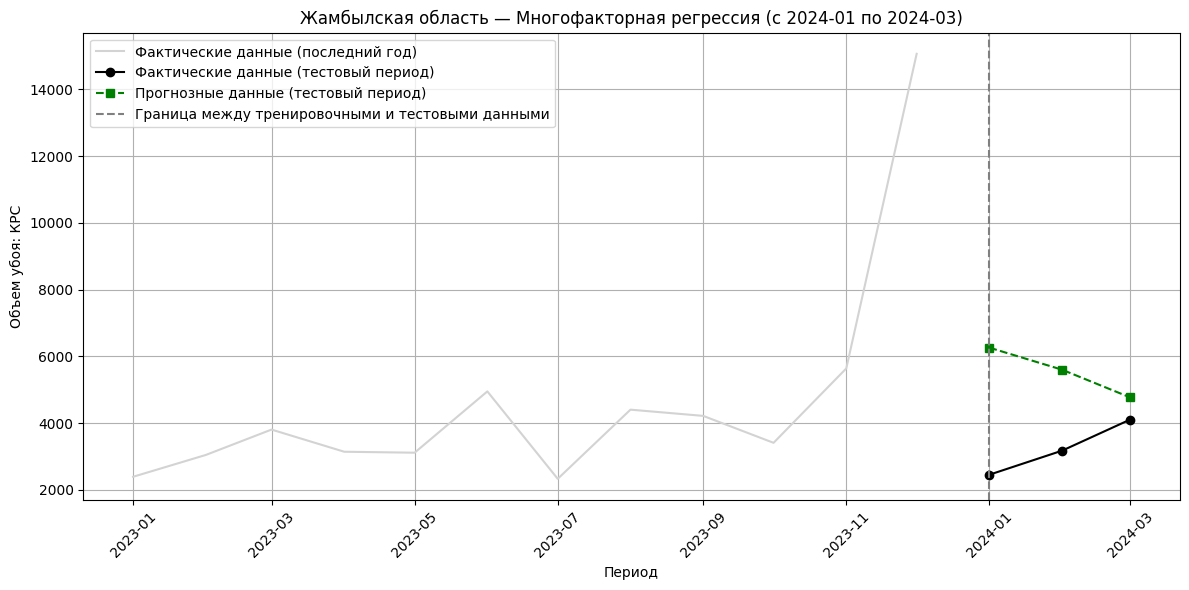

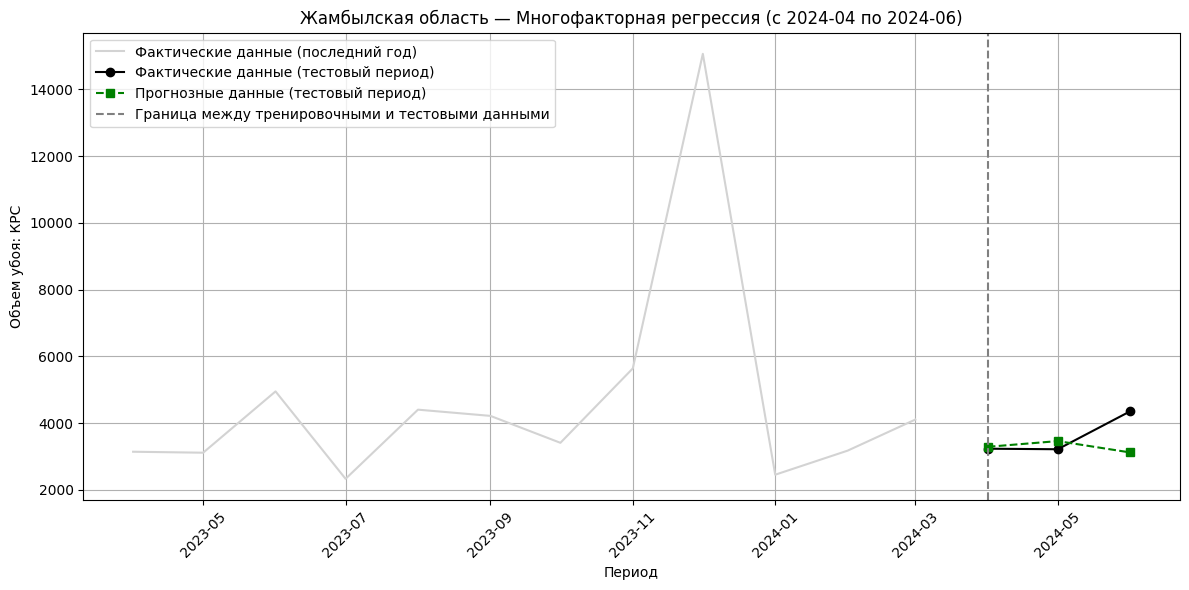

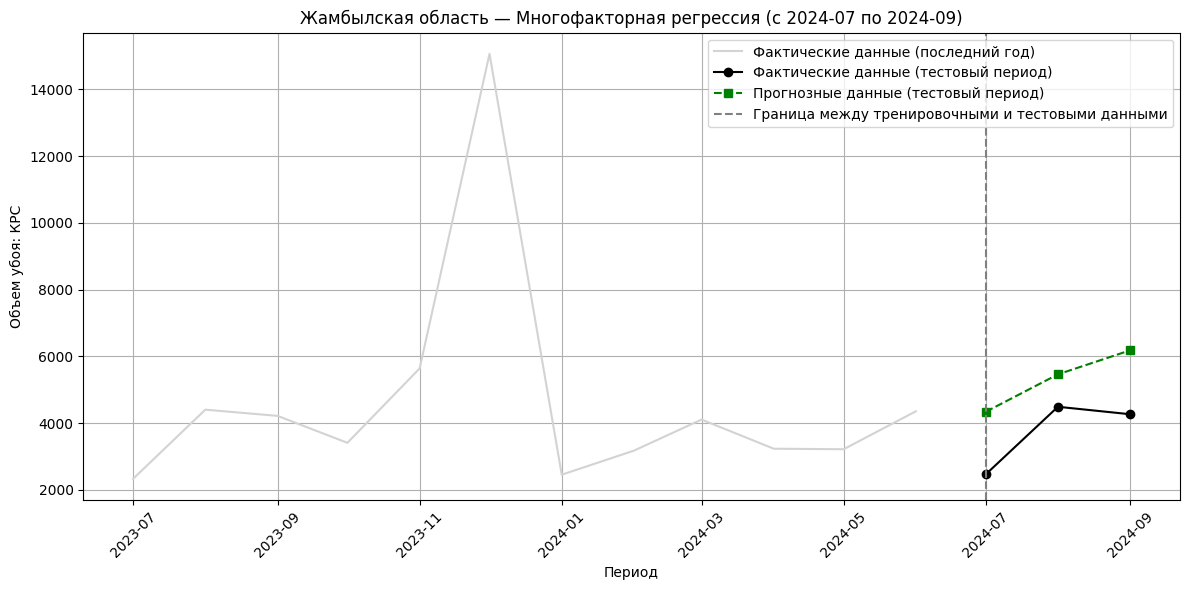

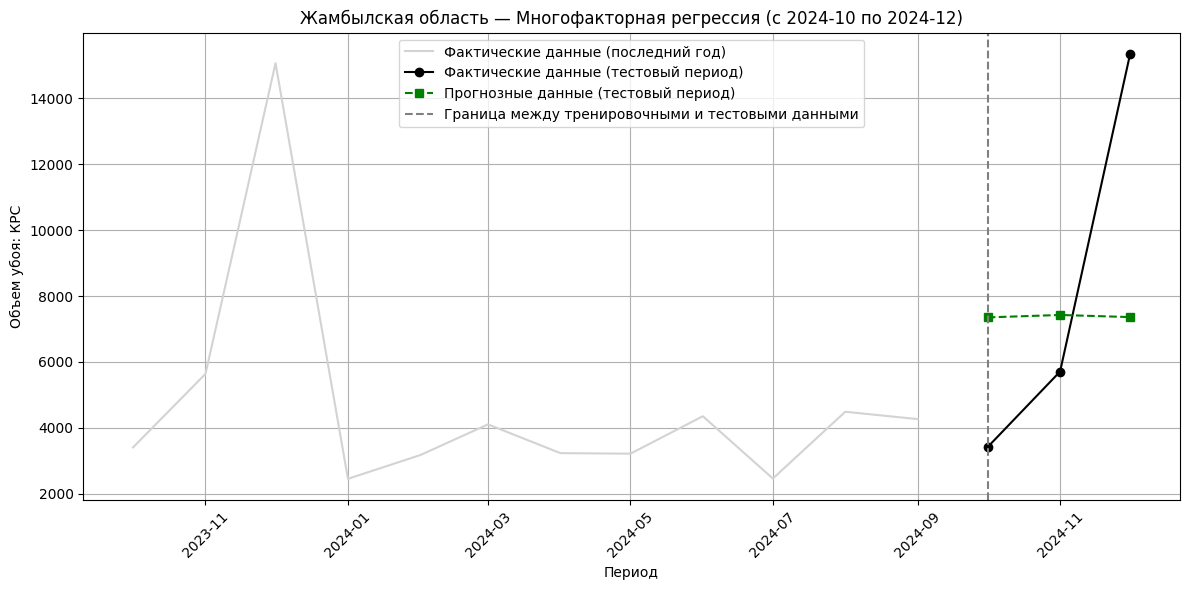

In [33]:
df = df_selected.sort_values("–ü–µ—Ä–∏–æ–¥").copy()

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
features = [col for col in df_selected.columns if col not in ['–ü–µ—Ä–∏–æ–¥', '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°']]

results = []

# Define 4 rolling test sets for 2024
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    X_train = sm.add_constant(train_df[features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [34]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-01 to 2024-03  2634.374614  2298.991552  82.623864
1  2024-04 to 2024-06   726.297790   511.234113  12.559139
2  2024-07 to 2024-09  1646.763681  1587.989216  47.602481
3  2024-10 to 2024-12  5236.345478  4546.676214  65.735415
4             Average  2560.945391  2236.222774  52.130225


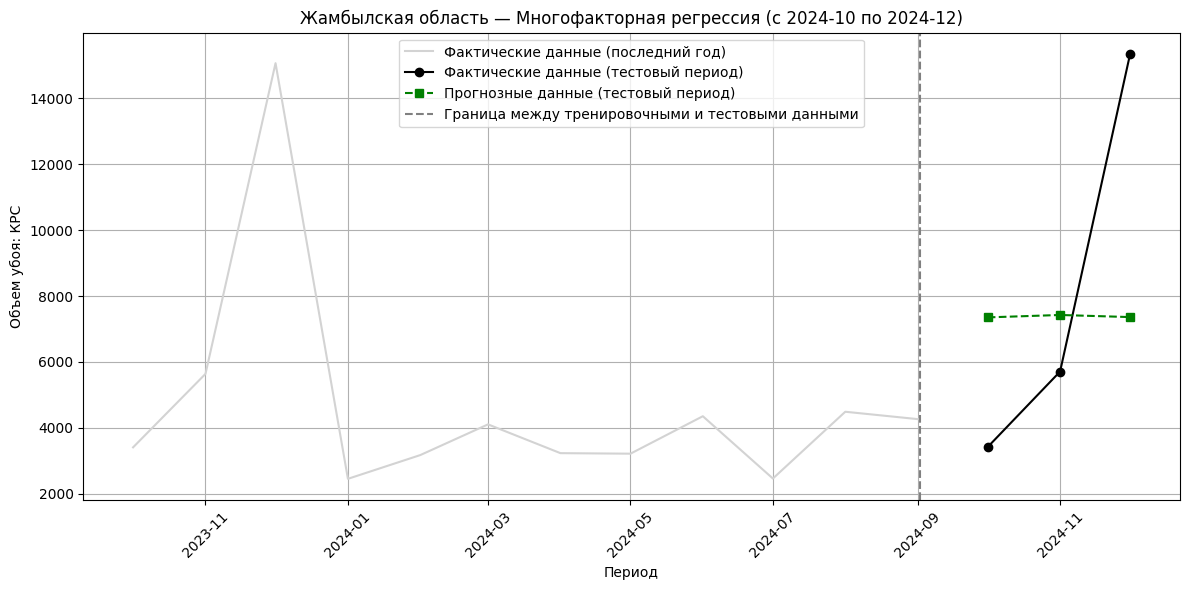

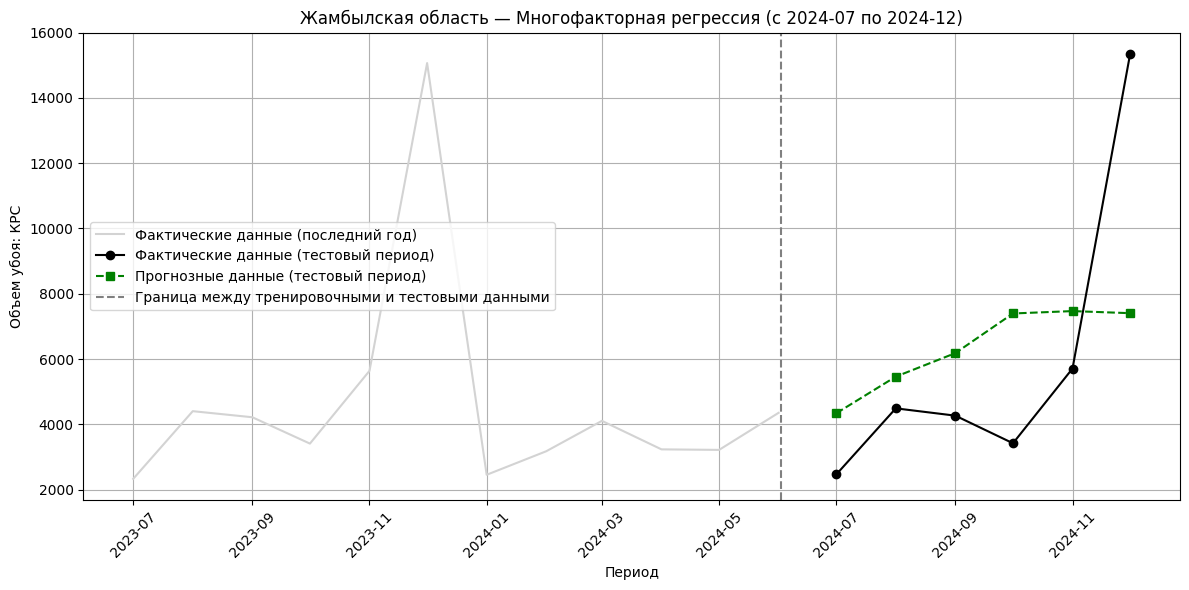

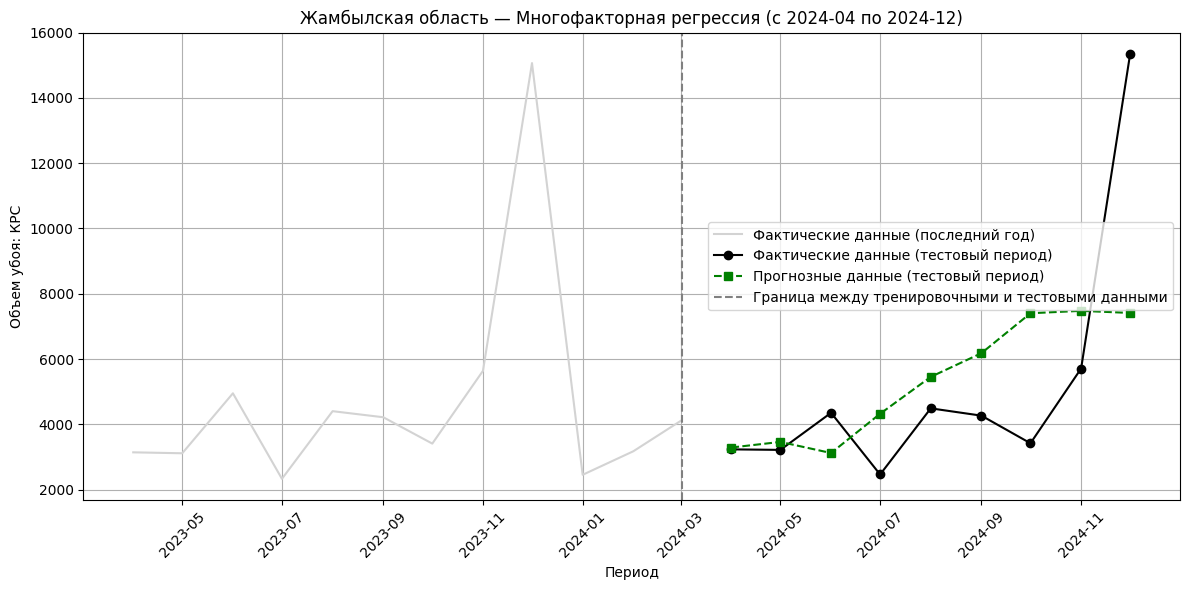

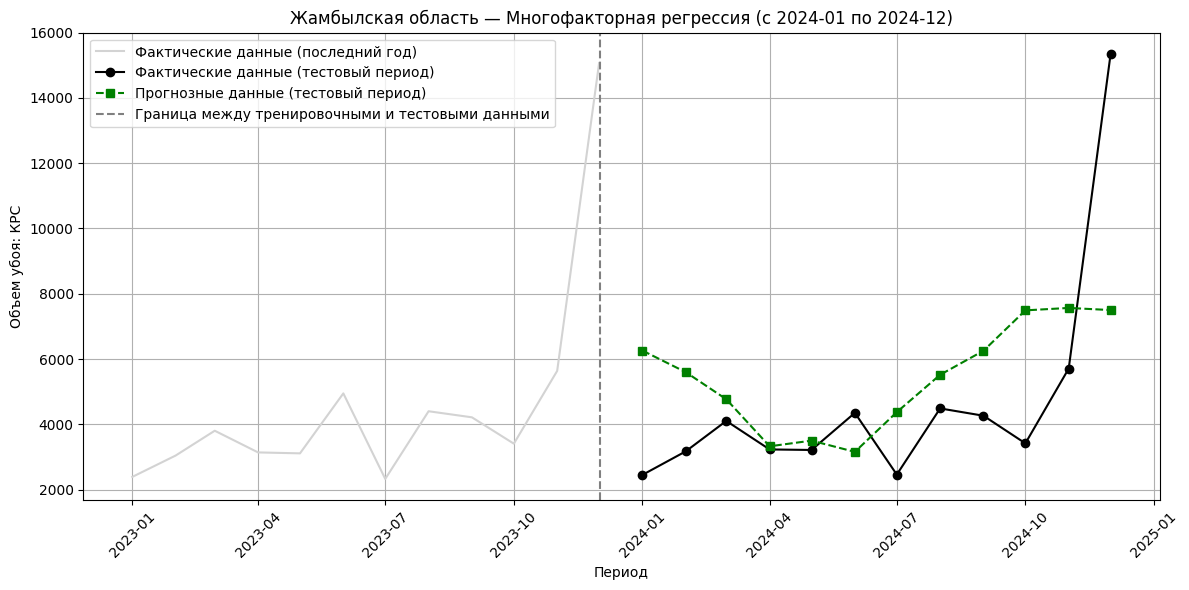

In [35]:
results = []

# Define 4 rolling test sets for 2024
horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    X_train = sm.add_constant(train_df[features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [36]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-10 to 2024-12  5236.345478  4546.676214  65.735415
1  2024-07 to 2024-12  3877.224375  3074.527685  56.958512
2  2024-04 to 2024-12  3191.502628  2218.223430  42.099315
3  2024-01 to 2024-12  3064.335465  2265.699122  53.116877
4             Average  3842.351987  3026.281613  54.477530


#### SARIMA (auto-arima)

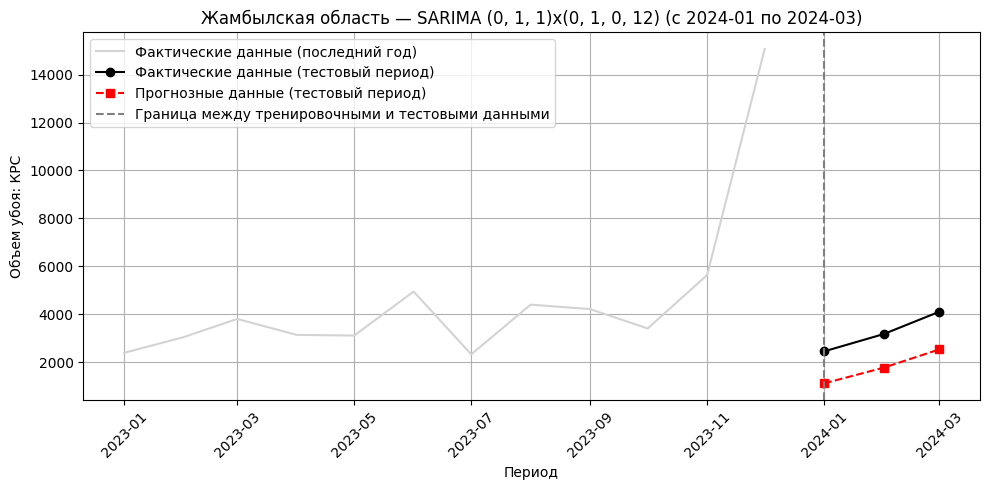

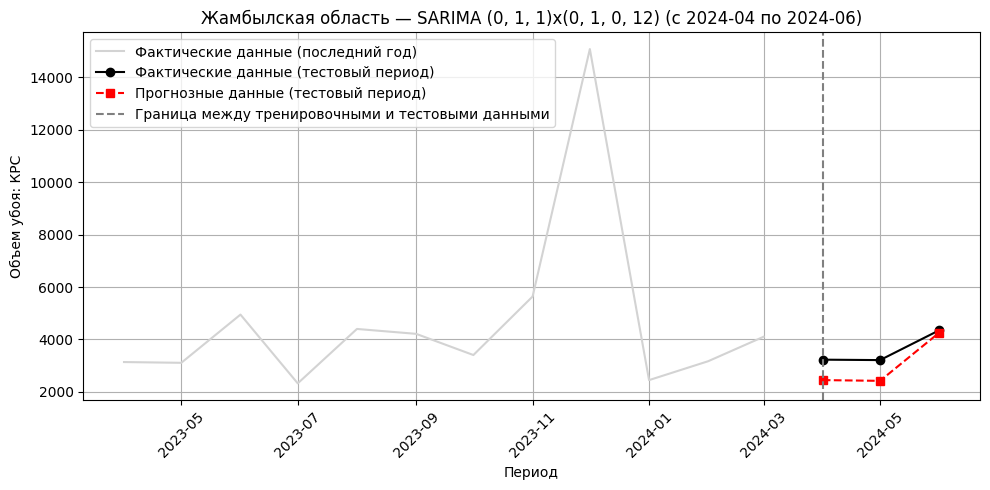

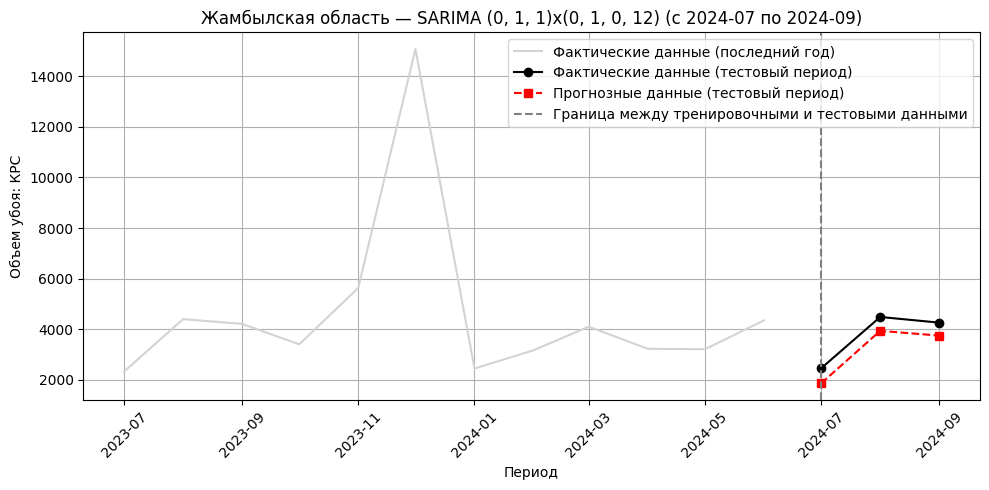

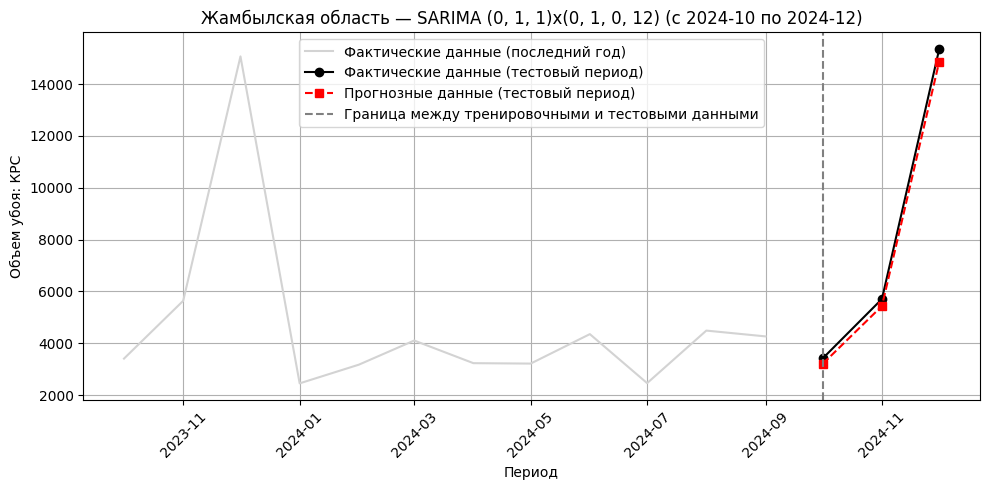

In [37]:
results = []

# –û–ø—Ä–µ–¥–µ–ª–∏–º 4 —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞ 3 –º–µ—Å—è—Ü–∞
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=3)
        forecast = pd.Series(forecast).reset_index(drop=True)


        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {test_start.strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        # print("Zero values in y_test:", (y_test == 0).sum())


    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [38]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period         RMSE          MAE   MAPE (%) SARIMA order  \
0  2024-01 to 2024-03  1440.235810  1436.741592  45.649705    (0, 1, 1)   
1  2024-04 to 2024-06   642.785754   553.236452  16.921046    (0, 1, 1)   
2  2024-07 to 2024-09   552.324527   551.265401  16.117770    (0, 1, 1)   
3  2024-10 to 2024-12   342.563735   321.785717   4.683379    (0, 1, 1)   
4             Average   744.477456   715.757290  20.842975          NaN   

  Seasonal order  
0  (0, 1, 0, 12)  
1  (0, 1, 0, 12)  
2  (0, 1, 0, 12)  
3  (0, 1, 0, 12)  
4            NaN  


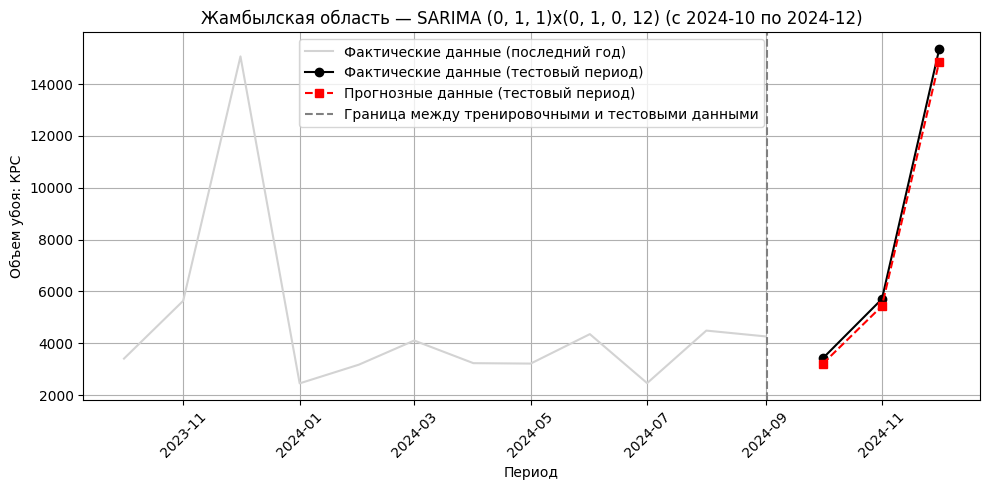

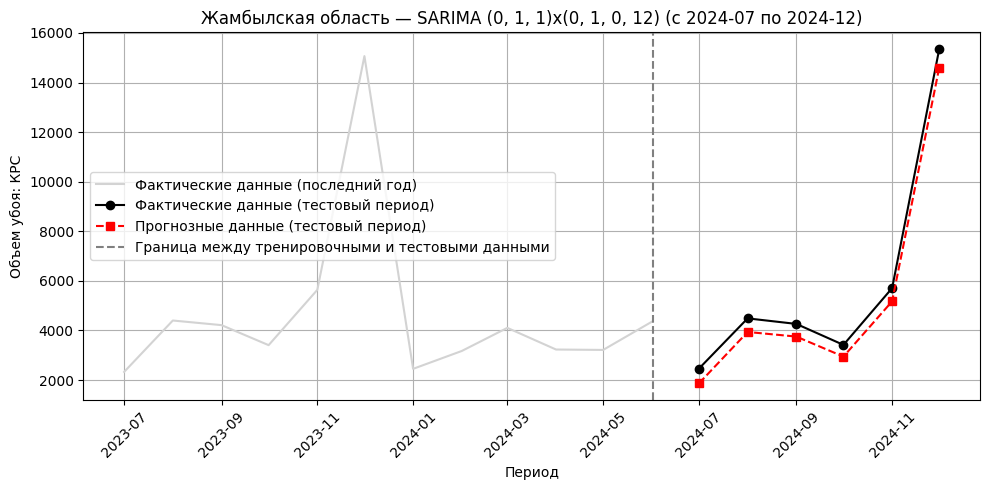

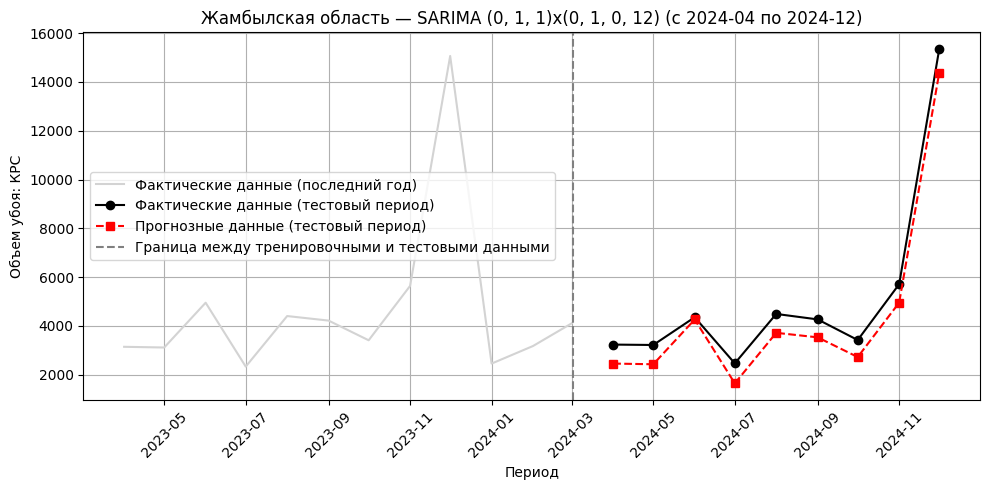

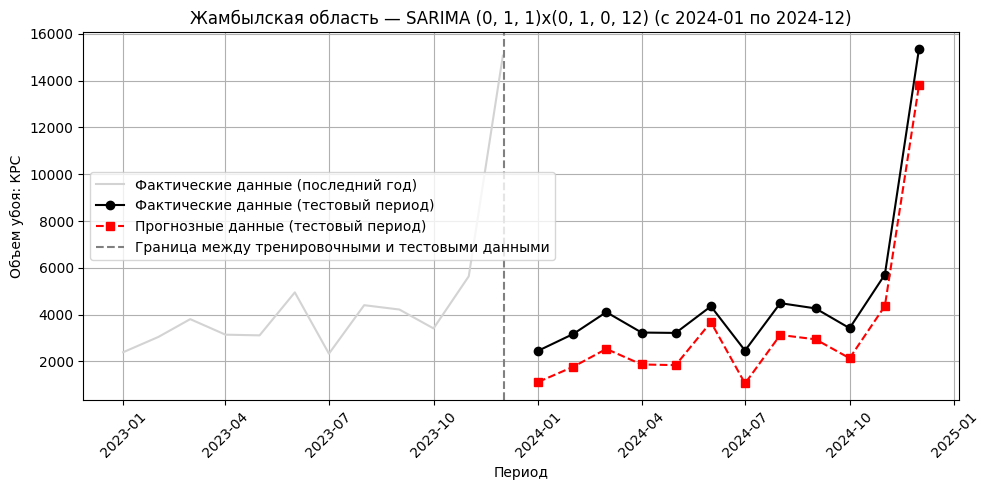

In [39]:
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)
    
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=horizon)
        forecast = pd.Series(forecast).reset_index(drop=True)

        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [41]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period         RMSE          MAE   MAPE (%) SARIMA order  \
0  2024-10 to 2024-12   342.563735   321.785717   4.683379    (0, 1, 1)   
1  2024-07 to 2024-12   574.267607   567.480401  12.726704    (0, 1, 1)   
2  2024-04 to 2024-12   749.634722   712.970897  17.621595    (0, 1, 1)   
3  2024-01 to 2024-12  1350.459325  1333.204925  35.594989    (0, 1, 1)   
4             Average   754.231347   733.860485  17.656667          NaN   

  Seasonal order  
0  (0, 1, 0, 12)  
1  (0, 1, 0, 12)  
2  (0, 1, 0, 12)  
3  (0, 1, 0, 12)  
4            NaN  


#### SARIMAX

In [ ]:
results = []

start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[features].reset_index(drop=True)
    exog_test = test_df[features].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(0, 1, 1),
            seasonal_order=(0, 1, 0, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=3, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMAX (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [ ]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)



In [ ]:
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:
    # test_start = pd.to_datetime(start)
    # test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[features].reset_index(drop=True)
    exog_test = test_df[features].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(0, 1, 1),
            seasonal_order=(0, 1, 0, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=horizon, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMAX (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [ ]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)

#### Prophet

19:45:49 - cmdstanpy - INFO - Chain [1] start processing
19:45:49 - cmdstanpy - INFO - Chain [1] done processing


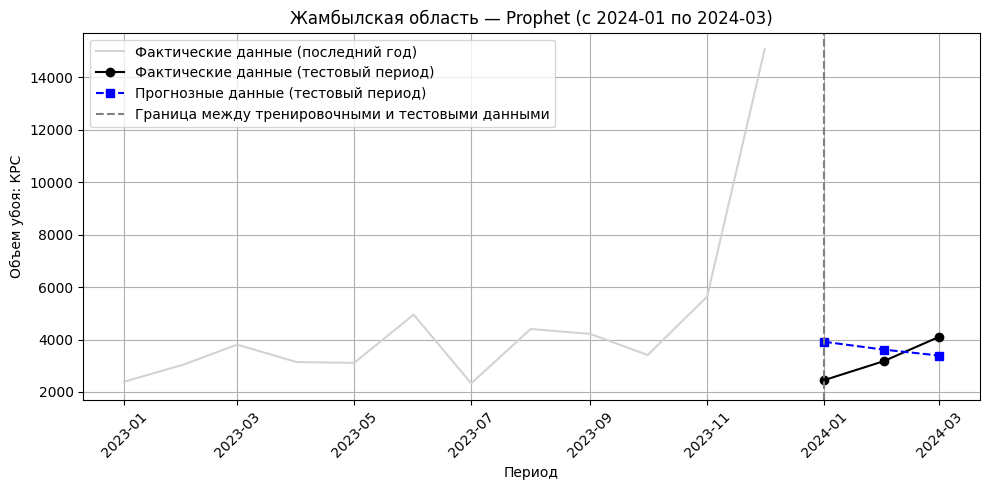

19:45:50 - cmdstanpy - INFO - Chain [1] start processing
19:45:50 - cmdstanpy - INFO - Chain [1] done processing


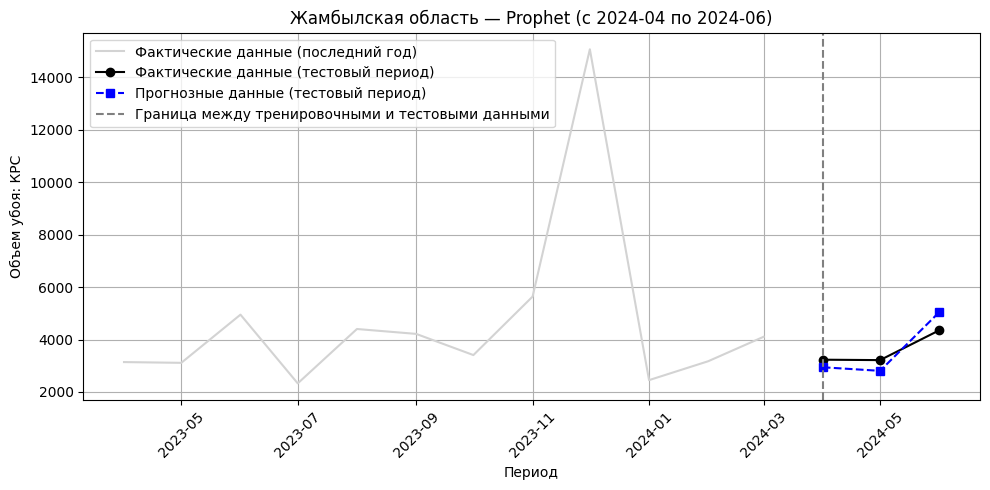

19:45:50 - cmdstanpy - INFO - Chain [1] start processing
19:45:50 - cmdstanpy - INFO - Chain [1] done processing


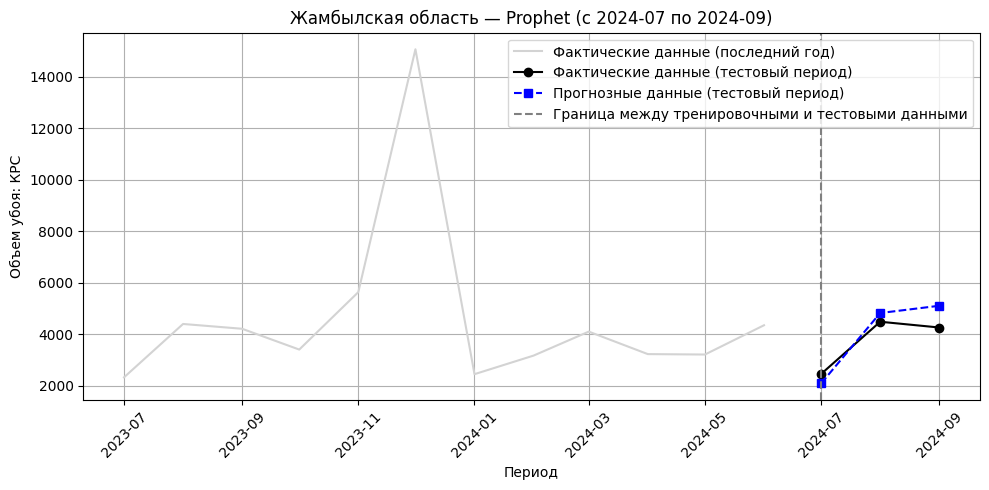

19:45:51 - cmdstanpy - INFO - Chain [1] start processing
19:45:51 - cmdstanpy - INFO - Chain [1] done processing


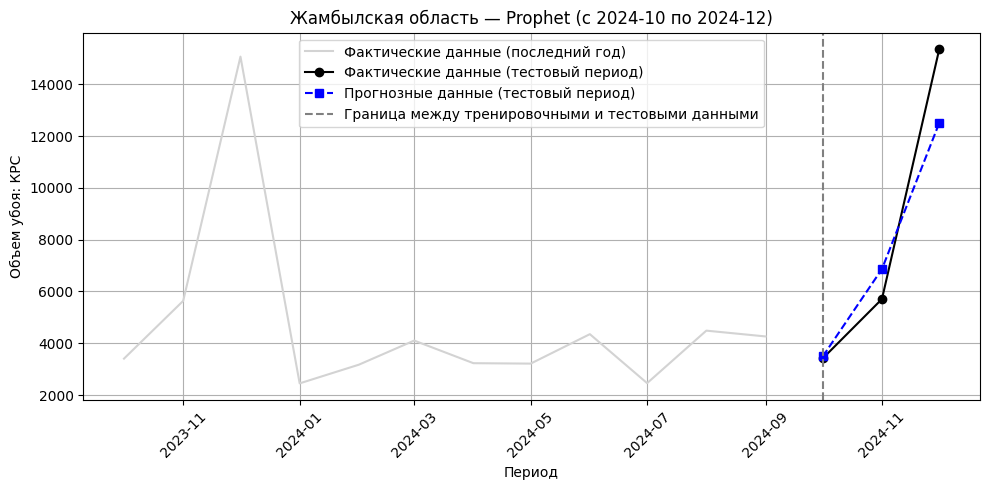

In [46]:
results = []

# Define 4 test periods
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Train/test split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Initialize Prophet
    model = Prophet()

    # Optional: add regressors
    # model.add_regressor("–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1")
    # prophet_train["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"] = train_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"].values
    # prophet_test["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"] = test_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"].values

    # Fit
    model.fit(prophet_train)

    # Create future dataframe
    future = model.make_future_dataframe(periods=3, freq="M")
    forecast = model.predict(future)
# forecast
# prophet_test

    # Extract forecast for test period only
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî Prophet (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [47]:
results_df = pd.DataFrame(results)
avg = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg])], ignore_index=True)
print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-01 to 2024-03   974.233500   873.681452  30.343860
1  2024-04 to 2024-06   492.752050   463.001294  12.513063
2  2024-07 to 2024-09   565.723519   515.994924  14.063369
3  2024-10 to 2024-12  1774.548580  1359.706004  13.673356
4             Average   951.814412   803.095918  17.648412


19:46:04 - cmdstanpy - INFO - Chain [1] start processing
19:46:04 - cmdstanpy - INFO - Chain [1] done processing


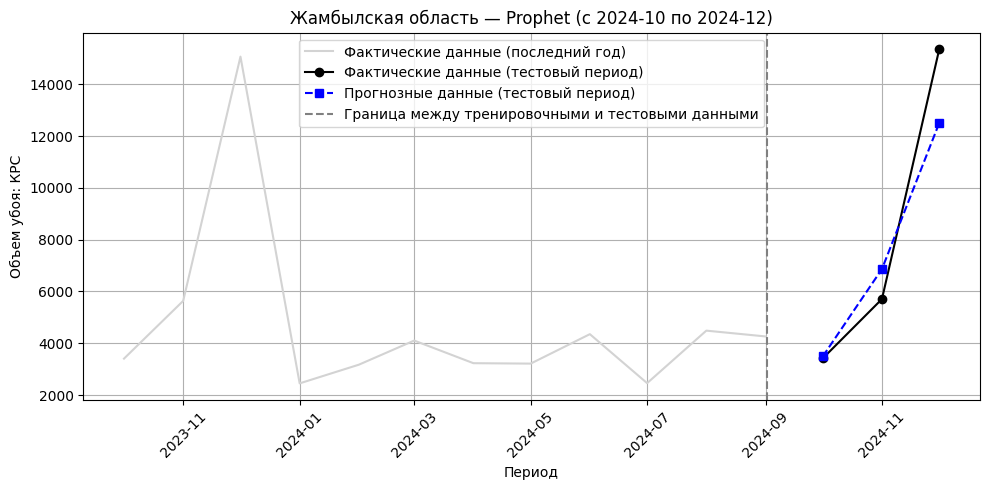

19:46:04 - cmdstanpy - INFO - Chain [1] start processing
19:46:04 - cmdstanpy - INFO - Chain [1] done processing


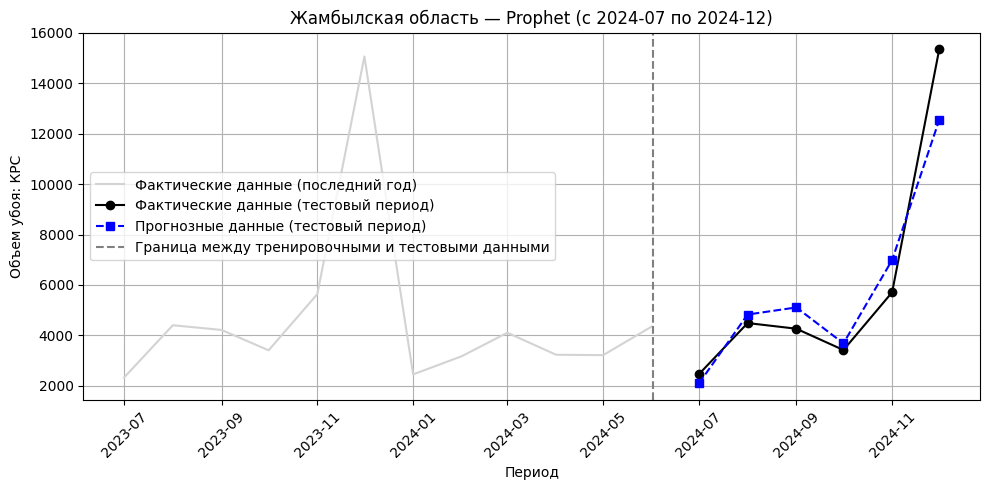

19:46:05 - cmdstanpy - INFO - Chain [1] start processing
19:46:05 - cmdstanpy - INFO - Chain [1] done processing


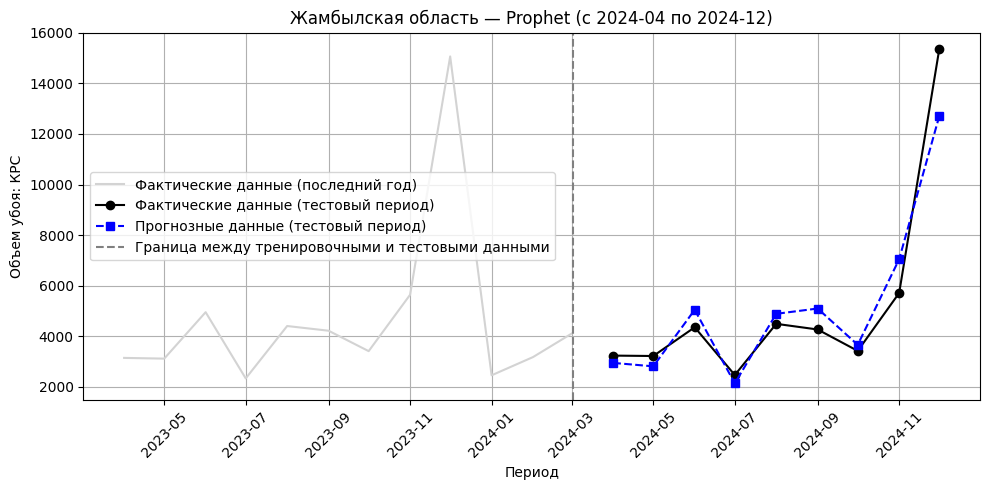

19:46:05 - cmdstanpy - INFO - Chain [1] start processing
19:46:05 - cmdstanpy - INFO - Chain [1] done processing


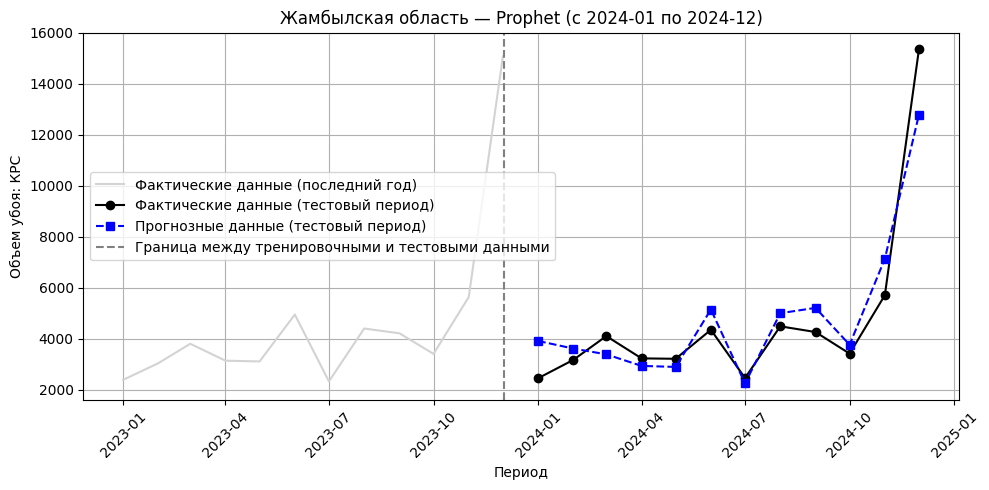

In [48]:
horizons = [3, 6, 9, 12]
results = []

for horizon in horizons:

    # Define train/test split
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Fit Prophet
    model = Prophet()
    model.fit(prophet_train)

    # Forecast
    future = model.make_future_dataframe(periods=horizon, freq="M")
    forecast = model.predict(future)

    # Extract matching forecasted months
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ñ–∞–º–±—ã–ª—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî Prophet (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [49]:
# Summary table
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-10 to 2024-12  1774.548580  1359.706004  13.673356
1  2024-07 to 2024-12  1323.978347   982.326683  15.099313
2  2024-04 to 2024-12  1081.993379   796.204117  14.088501
3  2024-01 to 2024-12  1064.875242   837.024124  18.548259
4                 NaN  1311.348887   993.815232  15.352357


strength of correlation:
https://link.springer.com/article/10.1057/jt.2009.5#
https://resources.nu.edu/statsresources/correlation